***
<div style="text-align:center">
     <h1 align="center">
         <i class="fas fa-calendar-day" aria-hidden="true">  Day 13 of #3D_vision_journey </i>
    </h1>      
</div>

<h3 style='text-align: center;'>
    <img  src="../images/open3d_logo.png" height="50"/>     
</h3>

* Load the libraries

In [1]:
import open3d as o3d
import numpy as np
import time
import copy
import open3d_tutorial as o3dtut

draw_bit = 1 # draw it or not!

###  Load point cloud

Load a point cloud , paint it gray, and render it


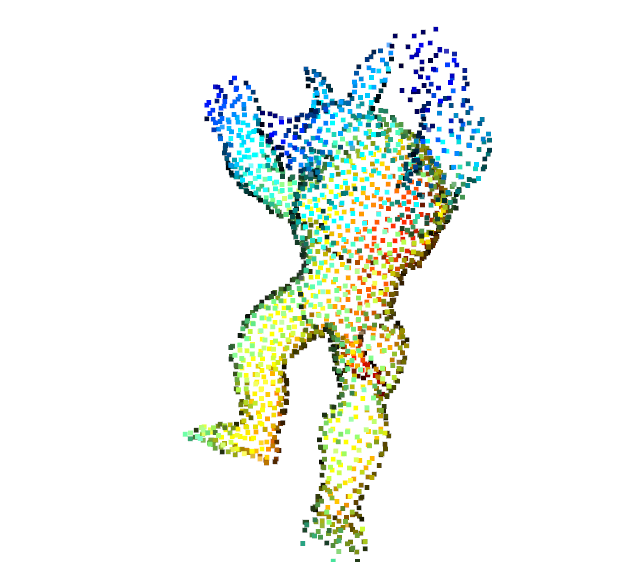

In [2]:
print("Load a point cloud , paint it gray, and render it")
N = 2000
pcd = o3dtut.get_armadillo_mesh().sample_points_poisson_disk(N)


if draw_bit:
    o3d.visualization.draw_geometries([pcd])


### fit to unit cube

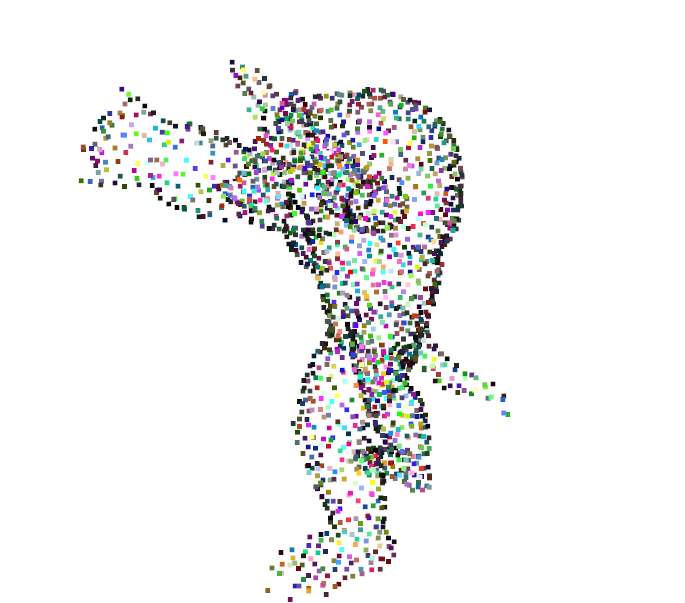

In [3]:
# 
pcd.scale(1 / np.max(pcd.get_max_bound() - pcd.get_min_bound()),
          center=pcd.get_center())
pcd.colors = o3d.utility.Vector3dVector(np.random.uniform(0, 1, size=(N, 3)))
o3d.visualization.draw_geometries([pcd])

### Octree division

* An `octree` is defined as a `tree data structure` in which each internal node has `exactly eight children`, where a three dimensional space is created by recursively subdividing it into eight octants

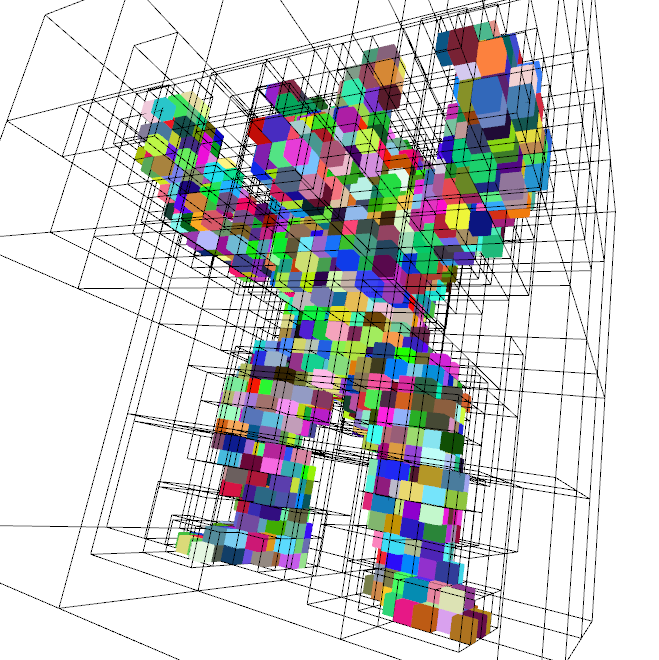

In [4]:
octree = o3d.geometry.Octree(max_depth=5)
octree.convert_from_point_cloud(pcd, size_expand=0.01)
o3d.visualization.draw_geometries([octree], "Octree")

### Voxelization

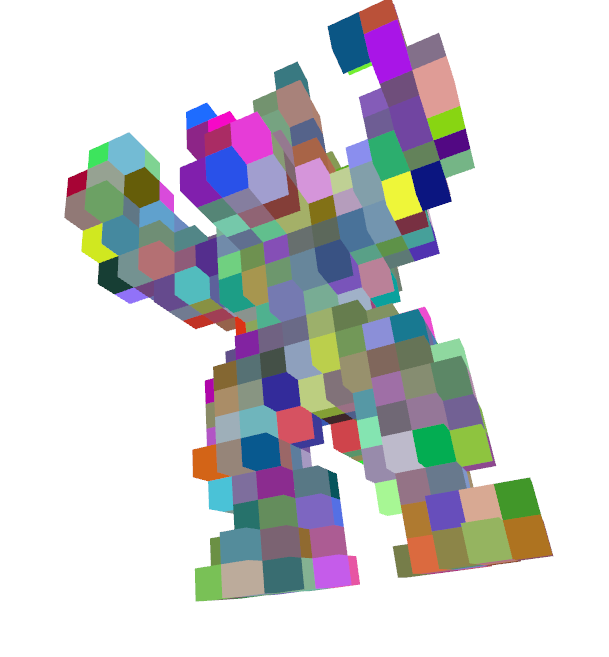

In [5]:
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, voxel_size=0.06)
o3d.visualization.draw_geometries([voxel_grid])

### Octree division (VoxelGrid to Octree)

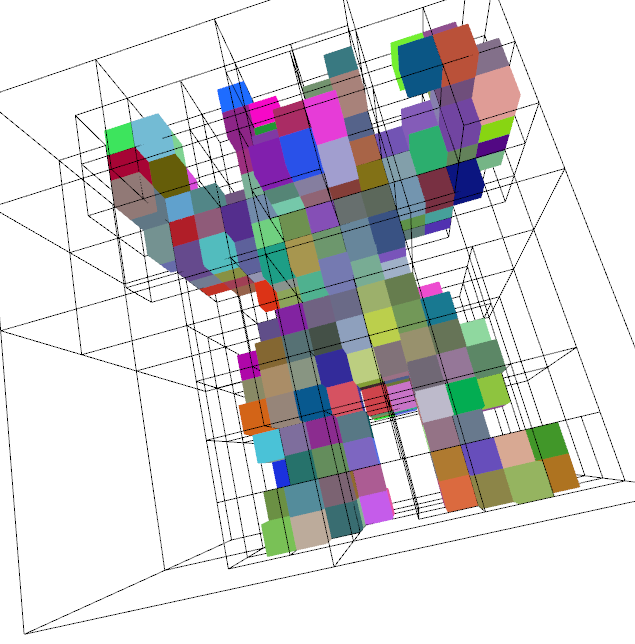

In [6]:
octree = o3d.geometry.Octree(max_depth=4)
octree.create_from_voxel_grid(voxel_grid)
o3d.visualization.draw_geometries([octree])

### Octree to VoxelGrid
*  an Octree can also be converted to a VoxelGrid with to_voxel_grid.


0: Internal node at depth 0 has 8 children and 2000 points ([-2.67850129 31.06898205  1.93292953])
    0: Internal node at depth 1 has 4 children and 64 points ([-2.67850129 31.06898205  1.93292953])
    1: Internal node at depth 1 has 2 children and 46 points ([-2.17350129 31.06898205  1.93292953])
    2: Internal node at depth 1 has 8 children and 413 points ([-2.67850129 31.57398205  1.93292953])
        0: Internal node at depth 2 has 2 children and 7 points ([-2.67850129 31.57398205  1.93292953])
        1: Internal node at depth 2 has 1 children and 5 points ([-2.42600129 31.57398205  1.93292953])
        2: Internal node at depth 2 has 4 children and 42 points ([-2.67850129 31.82648205  1.93292953])
        3: Internal node at depth 2 has 1 children and 5 points ([-2.42600129 31.82648205  1.93292953])
        4: Internal node at depth 2 has 4 children and 58 points ([-2.67850129 31.57398205  2.18542953])
        5: Internal node at depth 2 has 5 children and 92 points ([-2.42600

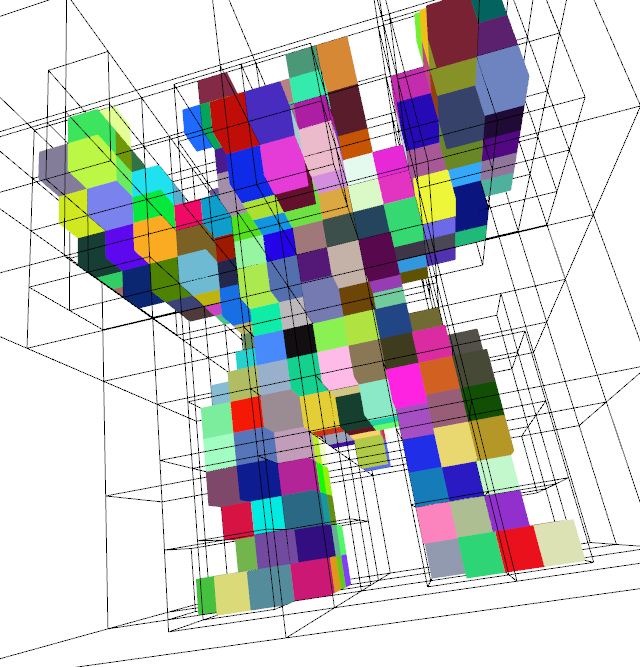

In [7]:
def f_traverse(node, node_info):
    early_stop = False
    if isinstance(node, o3d.geometry.OctreeInternalNode):
        if isinstance(node, o3d.geometry.OctreeInternalPointNode):
            n = 0
            for child in node.children:
                if child is not None:
                    n += 1
            print(
                "{}{}: Internal node at depth {} has {} children and {} points ({})"
                .format('    ' * node_info.depth,
                        node_info.child_index, node_info.depth, n,
                        len(node.indices), node_info.origin))

            # we only want to process nodes / spatial regions with enough points
            early_stop = len(node.indices) < 250

    elif isinstance(node, o3d.geometry.OctreeLeafNode):
        if isinstance(node, o3d.geometry.OctreePointColorLeafNode):
            print("{}{}: Leaf node at depth {} has {} points with origin {}".
                  format('    ' * node_info.depth, node_info.child_index,
                         node_info.depth, len(node.indices), node_info.origin))
    else:
        raise NotImplementedError('Node type not recognized!')

    # early stopping: if True, traversal of children of the current node will be skipped
    return early_stop

octree = o3d.geometry.Octree(max_depth=4)
octree.convert_from_point_cloud(pcd, size_expand=0.01)
octree.traverse(f_traverse)
o3d.visualization.draw_geometries([octree])